In [ ]:
import os
from skimage.io import imread
from skimage.transform import resize
from PIL import Image
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
input_dir="/content/drive/MyDrive/train"
input_dir

'/content/drive/MyDrive/train'

In [ ]:
categories=["cats","dogs"]
for category in categories:
    for file in os.listdir(os.path.join(input_dir,category)):
        img_path=os.path.join(input_dir,category,file)
        print(img_path)


/content/drive/MyDrive/train/cats/cat.131.jpg
/content/drive/MyDrive/train/cats/cat.122.jpg
/content/drive/MyDrive/train/cats/cat.106.jpg
/content/drive/MyDrive/train/cats/cat.132.jpg
/content/drive/MyDrive/train/cats/cat.109.jpg
/content/drive/MyDrive/train/cats/cat.105.jpg
/content/drive/MyDrive/train/cats/cat.119.jpg
/content/drive/MyDrive/train/cats/cat.130.jpg
/content/drive/MyDrive/train/cats/cat.128.jpg
/content/drive/MyDrive/train/cats/cat.125.jpg
/content/drive/MyDrive/train/cats/cat.1.jpg
/content/drive/MyDrive/train/cats/cat.123.jpg
/content/drive/MyDrive/train/cats/cat.113.jpg
/content/drive/MyDrive/train/cats/cat.102.jpg
/content/drive/MyDrive/train/cats/cat.112.jpg
/content/drive/MyDrive/train/cats/cat.108.jpg
/content/drive/MyDrive/train/cats/cat.115.jpg
/content/drive/MyDrive/train/cats/cat.118.jpg
/content/drive/MyDrive/train/cats/cat.110.jpg
/content/drive/MyDrive/train/cats/cat.116.jpg
/content/drive/MyDrive/train/cats/cat.114.jpg
/content/drive/MyDrive/train/cats/ca

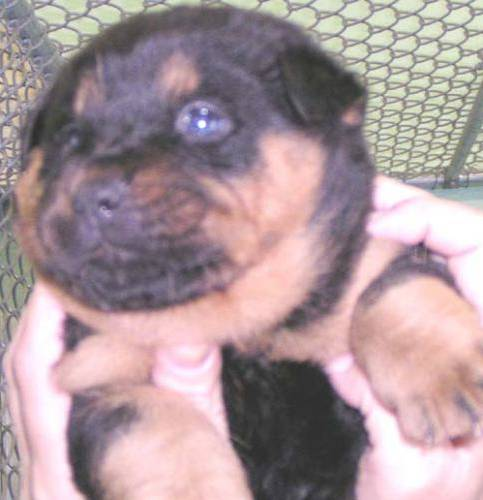

In [ ]:
Image.open("/content/drive/MyDrive/train/dogs/dog.999.jpg")

In [ ]:
img_path="/content/drive/MyDrive/Cats&Dogs/cat.101.jpg"
img=imread(img_path)
print(img)

[[[ 72 254 255]
  [ 72 254 255]
  [ 72 254 255]
  ...
  [132 254 255]
  [132 254 255]
  [132 254 255]]

 [[ 71 253 254]
  [ 71 253 254]
  [ 71 253 254]
  ...
  [132 254 255]
  [132 254 255]
  [132 254 255]]

 [[ 70 252 253]
  [ 70 252 253]
  [ 70 252 253]
  ...
  [132 254 255]
  [132 254 255]
  [132 254 255]]

 ...

 [[104 225 218]
  [112 233 226]
  [118 238 229]
  ...
  [  0  79  74]
  [  0  75  71]
  [  0  74  70]]

 [[103 230 223]
  [115 240 232]
  [124 244 235]
  ...
  [162 241 238]
  [166 242 238]
  [171 246 242]]

 [[106 237 229]
  [122 249 240]
  [132 251 245]
  ...
  [174 253 250]
  [181 255 253]
  [187 255 255]]]


In [ ]:
img=resize(img,(15,15))
img=img.flatten()

In [ ]:
data=[]
label=[]

In [ ]:
for category_idx, category in enumerate(categories):
    for file in os.listdir(os.path.join(input_dir,category)):
        img_path=os.path.join(input_dir,category,file)
        img=imread(img_path)
        img=resize(img,(15,15))
        data.append(img.flatten())
        label.append(category_idx)

In [ ]:
label=np.asarray(label)
data=np.asarray(data)

In [ ]:
#Logistic regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

x_train,x_test,y_train,y_test = train_test_split(data,label,test_size=0.2,shuffle=True)

lr=LogisticRegression()
lr.fit(x_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred=lr.predict(x_test)
accuracy_score(y_test,y_pred)

0.62

In [ ]:
#DecisionTree

from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
accuracy_score(y_test,y_pred)

0.54

In [ ]:
#RandomForest

from sklearn.ensemble import RandomForestClassifier
dt=RandomForestClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
accuracy_score(y_test,y_pred)

0.6175

In [ ]:
import pandas as pd
pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

,y_test,y_pred
0,0,0
1,0,0
2,1,1
3,0,0
4,1,0
...,...,...
395,0,0
396,0,0
397,0,0
398,0,0
